In [1]:
import pandas as pd
import xlwings as xw
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="AppleGothic")

pd.options.display.max_columns = 423

In [4]:
def Preprocess():
    path = r'data/★(월간)KB주택가격동향_시계열(2021.01)_A지수통계.xlsx'
#     path = r'/Users/tedz/Downloads/eb43013db7b1de4e.xlsx'
    wb = xw.Book(path)
    sheet = wb.sheets['매매지수']
    # row_num = sheet.range(1,1).end('down').end('down').end('down').row
    # data_range = 'A2:GE' + str(row_num)
    raw_data = sheet['A2:GE425'].options(pd.DataFrame, index=False, header=True).value

    raw_data.columns = raw_data.columns.str.replace("\\n", "")

    for i in range(0, raw_data.columns.size):
        if raw_data.columns[i] is None:
            raw_data.columns.values[i] = tmpLocal + "-" + raw_data.loc[0][i]     
        else:
            tmpLocal = raw_data.columns[i]

    raw_data = raw_data.drop(index=[0,1])

    raw_data = raw_data.reset_index()

    raw_data = raw_data.drop("index", axis=1)

    raw_data.columns.values[0] = "년월"

    for i in range(0, len(raw_data)):    
        if len(str(raw_data.loc[i]["년월"]).split('.')) == 1 or str(raw_data.loc[i]["년월"]).split('.')[1] == "0":
            if len(str(raw_data.loc[i]["년월"]).split('.')[0]) == 1: 
                raw_data.loc[i]["년월"] = pd.to_datetime(tmpY + "-0" + str(raw_data.loc[i]["년월"]).split('.')[0])
            else:
                raw_data.loc[i]["년월"] = pd.to_datetime(tmpY + "-" + str(raw_data.loc[i]["년월"]).split('.')[0])
        else:
            tmpY = str(raw_data.loc[i]["년월"]).split('.')[0]
            raw_data.loc[i]["년월"] = pd.to_datetime(str(raw_data.loc[i]["년월"]).replace(".", "-0"))

#     raw_data.set_index(raw_data['년월'], inplace=True)
#     raw_data = raw_data.drop("년월", axis=1)
    
    return raw_data

In [5]:
df = Preprocess()

CommandError: Command failed:
		OSERROR: -609
		MESSAGE: Connection is invalid.
		COMMAND: app(pid=1334).workbooks['★(월간)kb주택가격동향_시계열(2021.01)_a지수통계.xlsx'].worksheets['매매지수'].cells['A2:GE425'].value.get()

In [235]:
df_capital_area = df[['년월',
 '전국',
 '서울',
 '강북14개구',
 '강북14개구-강북구',
 '강북14개구-광진구',
 '강북14개구-노원구',
 '강북14개구-도봉구',
 '강북14개구-동대문구',
 '강북14개구-마포구',
 '강북14개구-서대문구',
 '강북14개구-성동구',
 '강북14개구-성북구',
 '강북14개구-용산구',
 '강북14개구-은평구',
 '강북14개구-종로구',
 '강북14개구-중구',
 '강북14개구-중랑구',
 '강남11개구',
 '강남11개구-강남구',
 '강남11개구-강동구',
 '강남11개구-강서구',
 '강남11개구-관악구',
 '강남11개구-구로구',
 '강남11개구-금천구',
 '강남11개구-동작구',
 '강남11개구-서초구',
 '강남11개구-송파구',
 '강남11개구-양천구',
 '강남11개구-영등포구',
 '수도권',
 '경기',
 '수원',
 '수원-장안구',
 '수원-권선구',
 '수원-팔달구',
 '수원-영통구',
 '성남',
 '성남-수정구',
 '성남-중원구',
 '성남-분당구',
 '고양',
 '고양-덕양구',
 '고양-일산동구',
 '고양-일산서구',
 '안양',
 '안양-만안구',
 '안양-동안구',
 '부천',
 '의정부',
 '광명',
 '평택',
 '안산',
 '안산-단원구',
 '안산-상록구',
 '과천',
 '구리',
 '남양주',
 '용인',
 '용인-처인구',
 '용인-기흥구',
 '용인-수지구',
 '시흥',
 '군포',
 '의왕',
 '하남',
 '오산',
 '파주',
 '이천',
 '안성',
 '김포',
 '양주',
 '동두천',
 '광주',
 '화성',
 ]]

In [24]:
df_capital_area.shape

(25, 69)

In [243]:
df_capital_area_melt = df_capital_area.melt(id_vars="년월", var_name="지역", value_name="지수")

In [244]:
df_capital_area_melt["지수"] = pd.to_numeric(df_capital_area_melt["지수"])

<AxesSubplot:xlabel='지역', ylabel='지수'>

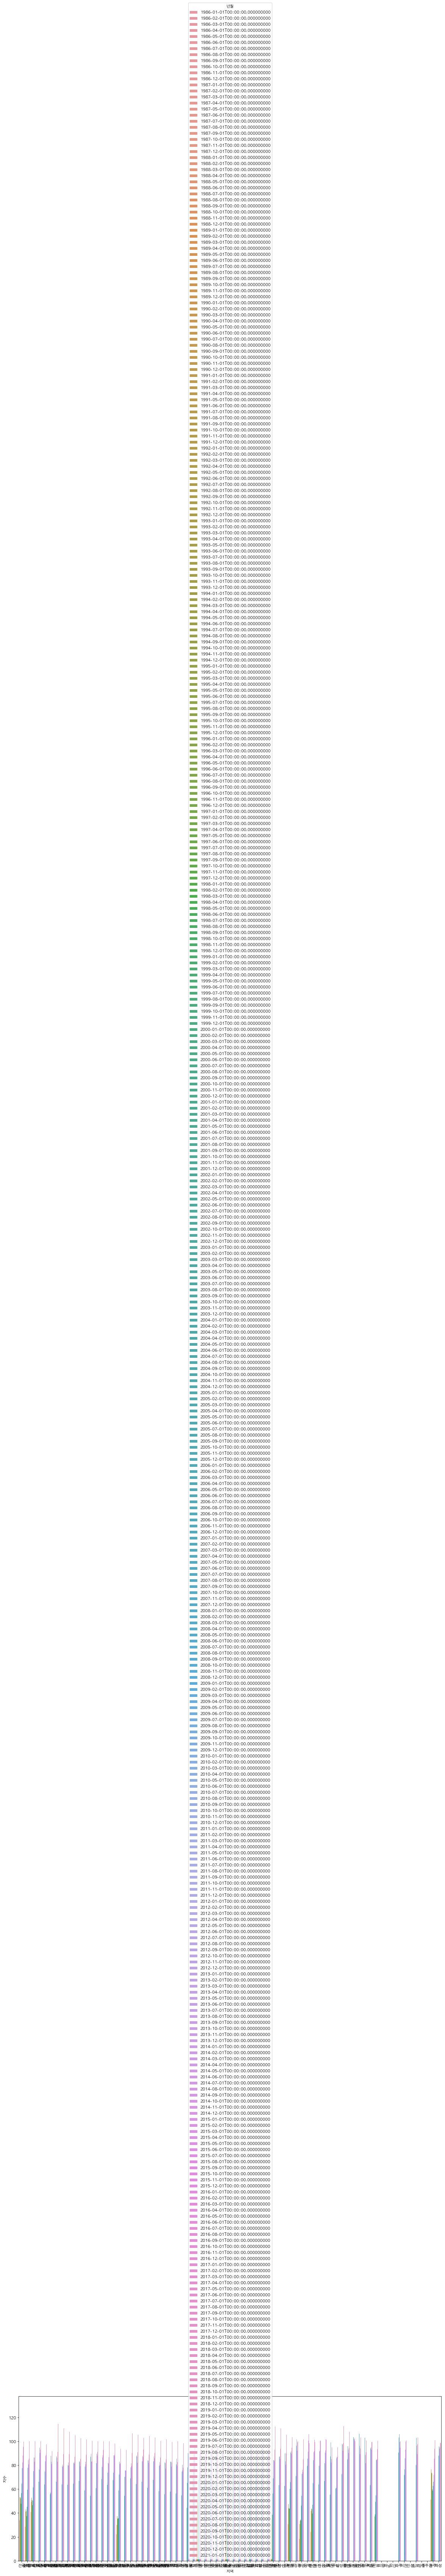

In [245]:
plt.figure(figsize=(20, 8))
sns.barplot(data=df_capital_area_melt, x="지역", y="지수", hue="년월", ci=None)

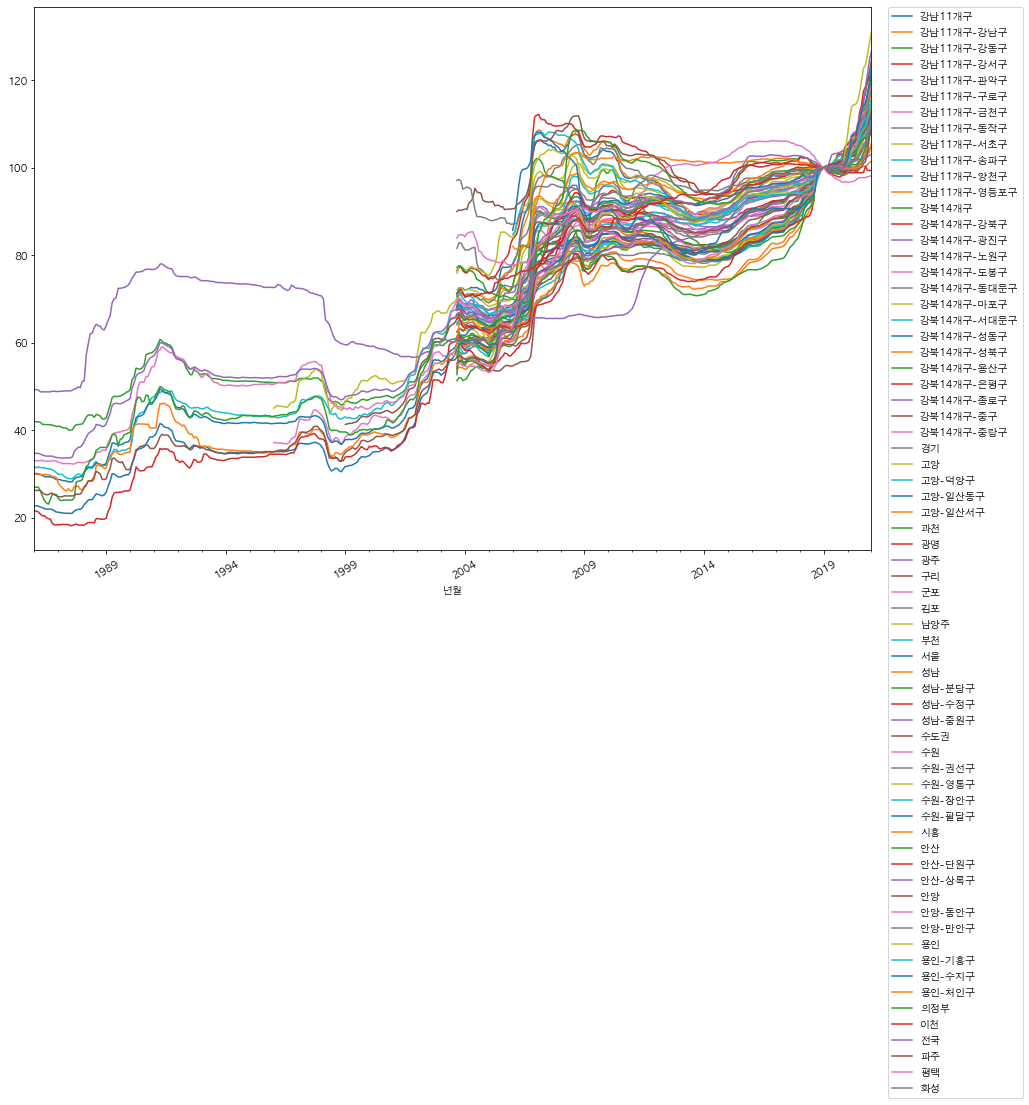

In [246]:
p = df_capital_area_melt.pivot_table(index="년월", columns=["지역"], values="지수")
p.plot(figsize=(15,10), rot=30)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [247]:
sns.relplot(data=df_capital_area_sample_melt, x="년월", y="지수", kind="line", hue="지역", col="지역", col_wrap=2, ci=None)

NameError: name 'df_capital_area_sample_melt' is not defined

In [ ]:
df_capital_area_melt.head()

In [253]:
# df_capital_area_melt.drop("증감", axis=1)
for i in df_capital_area_melt.index:
    if i>0 and df_capital_area_melt.loc[i, "지역"] == df_capital_area_melt.loc[i-1, "지역"]:
#         print(df_capital_area_melt.loc[i]["지역"], df_capital_area_melt.loc[i]["지수"]-df_capital_area_melt.loc[i-1]["지수"])
        diff = df_capital_area_melt.loc[i, "지수"] - df_capital_area_melt.loc[i-1, "지수"]
        df_capital_area_melt.loc[i, "증감"] = diff
    else:
        df_capital_area_melt.loc[i, "증감"] = 0
df_capital_area_melt["증감"] = pd.to_numeric(df_capital_area_melt["증감"])

In [257]:
df_capital_area_melt_2019 = df_capital_area_melt[df_capital_area_melt["년월"]>="2019-01-01"]

In [258]:
df_capital_area_melt_2019

,년월,지역,지수,증감
396,2019-01-01,전국,100.000000,0.020104
397,2019-02-01,전국,99.933774,-0.066226
398,2019-03-01,전국,99.829240,-0.104534
399,2019-04-01,전국,99.690688,-0.138552
400,2019-05-01,전국,99.625218,-0.065470
...,...,...,...,...
31570,2020-09-01,화성,104.733747,1.251049
31571,2020-10-01,화성,105.415691,0.681944
31572,2020-11-01,화성,107.457703,2.042013
31573,2020-12-01,화성,109.281273,1.823569


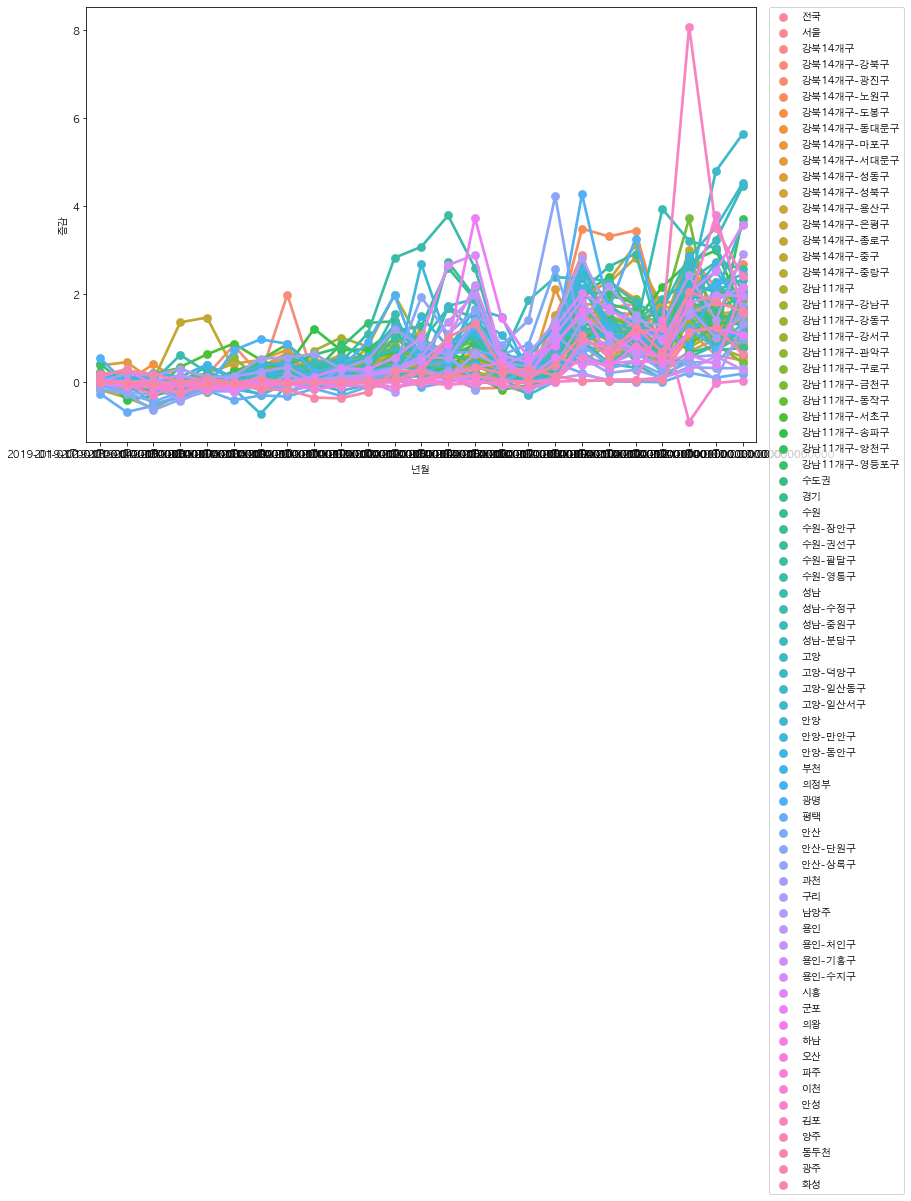

In [259]:
plt.figure(figsize=(12, 8))
sns.pointplot(data=df_capital_area_melt_2019, x="년월", y="증감", hue="지역")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [260]:
df_capital_area_melt_2019.head()

,년월,지역,지수,증감
396,2019-01-01,전국,100.000000,0.020104
397,2019-02-01,전국,99.933774,-0.066226
398,2019-03-01,전국,99.829240,-0.104534
399,2019-04-01,전국,99.690688,-0.138552
400,2019-05-01,전국,99.625218,-0.065470


In [263]:
# df_capital_area_melt.groupby(['년월'])['증감'].idxmax()

# 월별 최대 증가 지역
df_top = df_capital_area_melt_2019.
                sort_values(by=["증감"], ascending=False).
                        drop_duplicates(subset=['년월']).
                            sort_values(by=["년월"])

In [266]:
df_top

,년월,지역,지수,증감
21025,2019-01-01,광명,100.000000,0.542930
4186,2019-02-01,강북14개구-서대문구,100.445540,0.445540
3345,2019-03-01,강북14개구-동대문구,100.393181,0.405393
6293,2019-04-01,강북14개구-종로구,101.398963,1.352263
6294,2019-05-01,강북14개구-종로구,102.861903,1.462940
10926,2019-06-01,강남11개구-서초구,101.542548,0.869542
21031,2019-07-01,광명,100.628683,0.966296
1666,2019-08-01,강북14개구-강북구,102.989689,1.986028
11350,2019-09-01,강남11개구-송파구,101.315891,1.206972
7983,2019-10-01,강남11개구-강남구,100.791657,1.005145


,년월
21025,2019-01-01
4186,2019-02-01
3345,2019-03-01
6293,2019-04-01
6294,2019-05-01
10926,2019-06-01
21031,2019-07-01
1666,2019-08-01
11350,2019-09-01
7983,2019-10-01
